### Exercise 1
### Computational Intelligence CIS6005

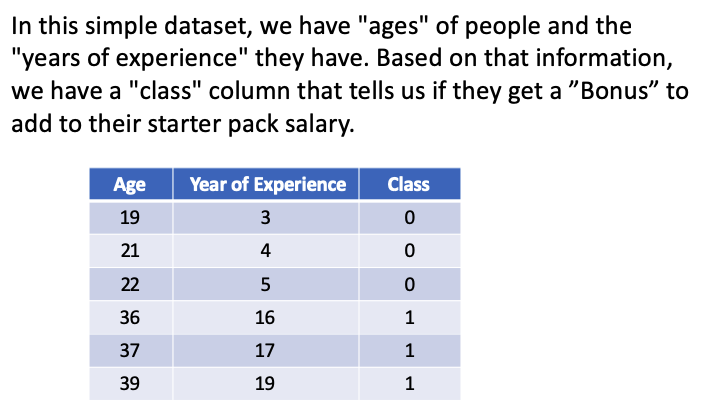

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Define "Inputs, outputs and weights" as Numpy arrays

#### Inputs

In [2]:
inputs = np.array([[19,3],[21,4],[22,5],[36,16],[37,17],[39,19]])

In [3]:
inputs
inputs.shape

(6, 2)

#### Outputs

In [4]:
outputs = np.array([0,0,0,1,1,1])

In [5]:
outputs.shape

(6,)

#### Initial Weights

In [6]:
weights = np.array([0.5,0.5])
weights.shape

(2,)

#### Learning rate

In [7]:
learning_rate = 0.1

# Visualizations

In [8]:

data = pd.DataFrame(data=inputs, columns=["age", "years_of_experience"])
data

,age,years_of_experience
0,19,3
1,21,4
2,22,5
3,36,16
4,37,17
5,39,19


In [9]:
class_df = pd.DataFrame(data=outputs, columns=["class"])
class_df

,class
0,0
1,0
2,0
3,1
4,1
5,1


#### Concatenating the two dataframes

In [10]:
df = pd.concat([data,class_df],axis=1)

In [11]:
df.head()

,age,years_of_experience,class
0,19,3,0
1,21,4,0
2,22,5,0
3,36,16,1
4,37,17,1


Ploting

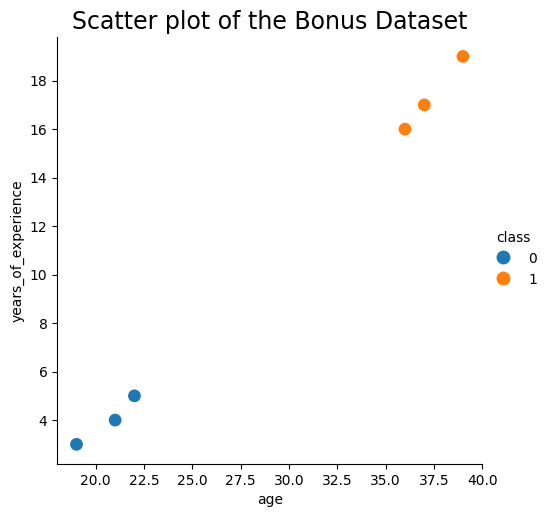

In [12]:
# using Seaborn to plot

sns.relplot(x="age", y="years_of_experience", data = df, hue = "class",s=100)
plt.title('Scatter plot of the Bonus Dataset',fontsize=17)
plt.show()

# The plot above shows us that we are dealing with a Linearly separable problem


## Min Max Scaler

<b style= 'color: blue'>We need to put the input values on the same scale. You can observe that the input values are not balanced, some are very large, and some are small. We need to normalize the data. We need to put them in the same scale, for example between zero and one. This is a crucial step when training your artificial neural networks.</b>

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [28]:
# Check new inputs values after scaling them

inputs

array([[0.    , 0.    ],
       [0.1   , 0.0625],
       [0.15  , 0.125 ],
       [0.85  , 0.8125],
       [0.9   , 0.8125],
       [1.    , 1.    ]])

## Step Function

In [22]:
# The step function is our Activation function

def step_function(sum):
  if (sum >= 1):
    #print(f'The Sum of Weights is Greater or equal to 1')
    return 1
  else:
     #   print(f'The Sum of Weights is NOT > or = to 1')
        return 0

## Process Output

<b>We define a function that allows us to calculate/ process the output. The function accepts an instance of our data, then calculate the sum function using Numpy. Finally, we check the output by passing it through the "Step Function."</b>

In [23]:
def cal_output(instance):
  sum_func = instance.dot(weights)
  return step_function(sum_func)

## Train

In [29]:
def train():
    #
    total_error_value = 1
    # While the total_error_value is not equal to zero. we are asumming that at the start of running our network there will be no zero
    while (total_error_value != 0):
        #making the total_error 0 so we can do other calculations
        total_error_value = 0
        #Looping into each row of the dataset (remember indexing in python starts at zero hence 0-5 which are 6 values)
        for i in range(len(outputs)):
            #Calculating predictions
            prediction = cal_output(inputs[i])
            # Calculating the absolute value of the error
            error = abs(outputs[i] - prediction)
            #Updating the error
            total_error_value  += error
            
            if error > 0:
                for j in range(len(weights)):
                    #updating the weights for x1 and x2
                    weights[j] = weights[j] + (learning_rate * inputs[i][j] * error)
                    print('Weight updated to: ' + str(weights[j]))
        print('Total error Value: ' + str(total_error_value))

In [30]:
train();

Weight updated to: 0.585
Weight updated to: 0.58125
Weight updated to: 0.6749999999999999
Weight updated to: 0.6625000000000001
Total error Value: 2
Total error Value: 0


In [31]:
weights

array([0.675 , 0.6625])

# TEST Data for our model

In [32]:
test_inputs = np.array([[16,4], [24,7],  
                        [44,11], [32,21]])

In [33]:
# We must Scale the dataset in the same range as we did when we trained the perceptron. Hence we transform the test inputs. 
# (We nomalize them)

test_inputs = scaler.fit_transform(test_inputs)

In [34]:
for m in range(len(test_inputs)):
  #print(test_inputs[m])
  print(cal_output(test_inputs[m]))

0
0
0
1
